# **AMPLY INNOVATIONS PRIVATED LIMITED**

**SUBMITTED BY**

Done By: Aditi Singh
created on : 01-08-2024

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Dataset Overview**

**This dataset contains daily activity data from wearable devices, likely collected from users' fitness trackers. The columns represent various physical activity metrics, distances covered, and calorie expenditure.**

- **Id:** Unique identifier for each user.
- **ActivityDate:** The date of the recorded activity.
- **TotalSteps:** The total number of steps taken by the user on that day.
- **TotalDistance:** The total distance covered by the user on that day.
- **TrackerDistance:** The distance tracked by the wearable device.
- **LoggedActivitiesDistance:** Distance covered in activities logged by the user.
- **VeryActiveDistance:** Distance covered while very active.
- **ModeratelyActiveDistance:** Distance covered while moderately active.
- **LightActiveDistance:** Distance covered while lightly active.
- **SedentaryActiveDistance:** Distance covered while sedentary.
- **VeryActiveMinutes:** Minutes spent being very active.
- **FairlyActiveMinutes:** Minutes spent being fairly active.
- **LightlyActiveMinutes:** Minutes spent being lightly active.
- **SedentaryMinutes:** Minutes spent being sedentary.
- **Calories:** Total calories burned by the user on that day.

In [ ]:
# Load the dataset
file_path = '/content/dailyActivity_merged.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Recommendations
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Try to burn more calories to maintain a health...
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Try to burn more calories to maintain a health...
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Try to burn more calories to maintain a health...
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Try to burn more calories to maintain a health...
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Try to burn more calories to maintain a health...


In [ ]:
df.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862


In [ ]:
print(df.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Recommendations             0
dtype: int64


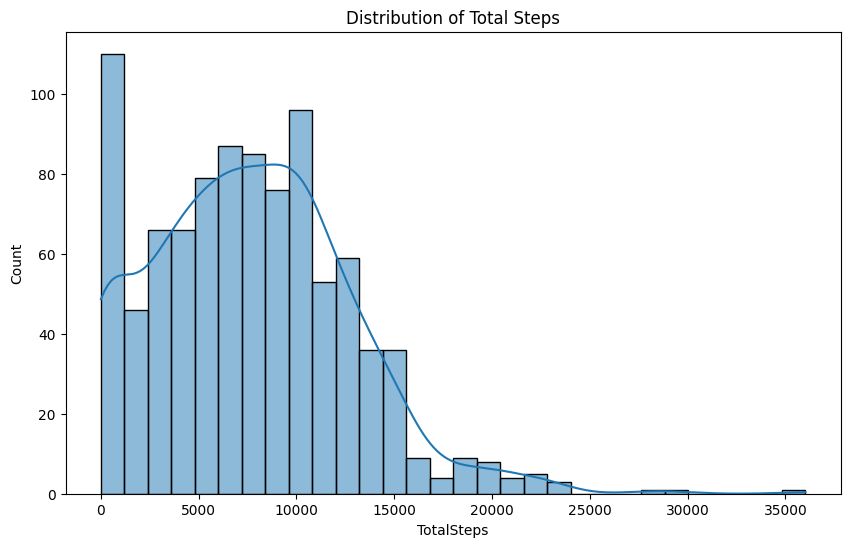

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalSteps'], bins=30, kde=True)
plt.title('Distribution of Total Steps')
plt.show()

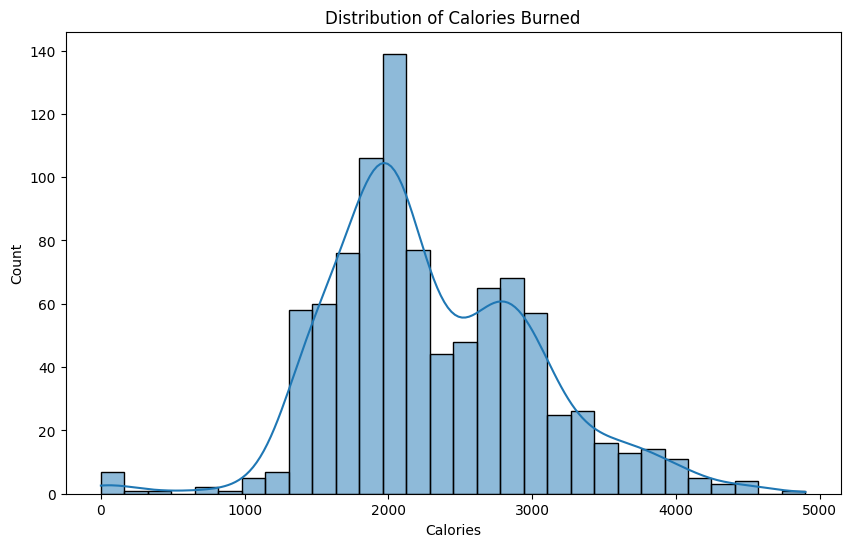

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Distribution of Calories Burned')
plt.show()

# Correlation and Relationships

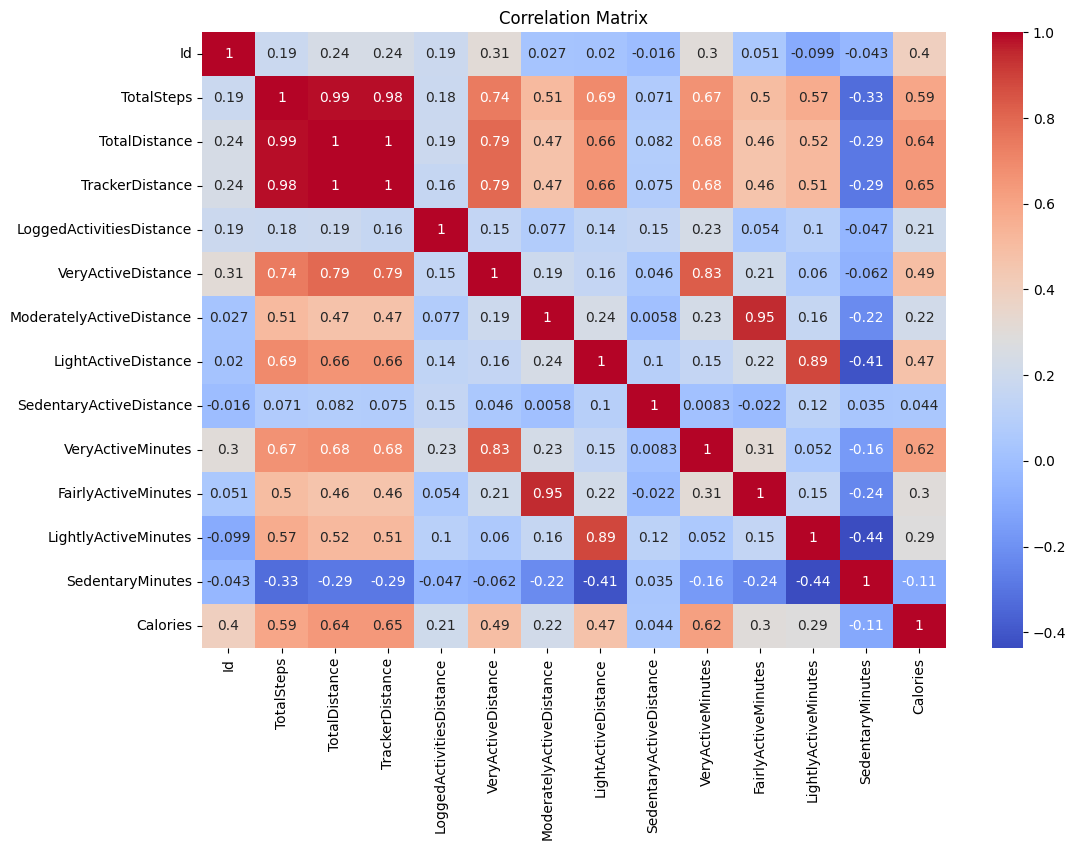

In [ ]:
# Excluding non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generating the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**INFERENCE:**
- There is a positive correlation between **TotalSteps** and **calories**(0.59).
- The **VeryActiveMinutes** is also showing a positive correlation for about 0.62 with **calories** which implies that more calories burn during very active minutes of a body.
- **SedentaryMinutes** and **LightActiveMinutes** are having the highest negative correlation compared to all the features.

# Predictive Modeling

In [ ]:
# Define features and target variable
features = ['TotalSteps', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
X = df[features]
y = df['Calories']

In [ ]:
# Normalize/Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


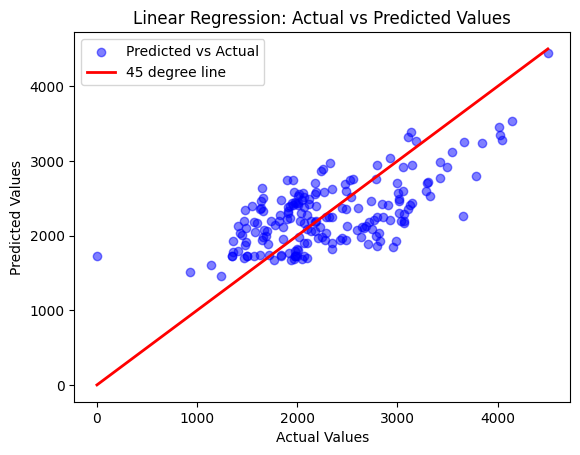

In [ ]:
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5, label='Predicted vs Actual')

line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color='red', linestyle='-', linewidth=2, label='45 degree line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.legend()

plt.show()

In [ ]:
# Evaluate models
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 518.1496530098348
Linear Regression R2 Score: 0.43199946615136653


**INFERENCE:** An R² score of 0.432 means that approximately 43.2% of the variance in the dependent variable (e.g., calories burned) can be explained by the independent variables (e.g., steps, distance, activity minutes) in your model.

# Random Forest Regressor Model

In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

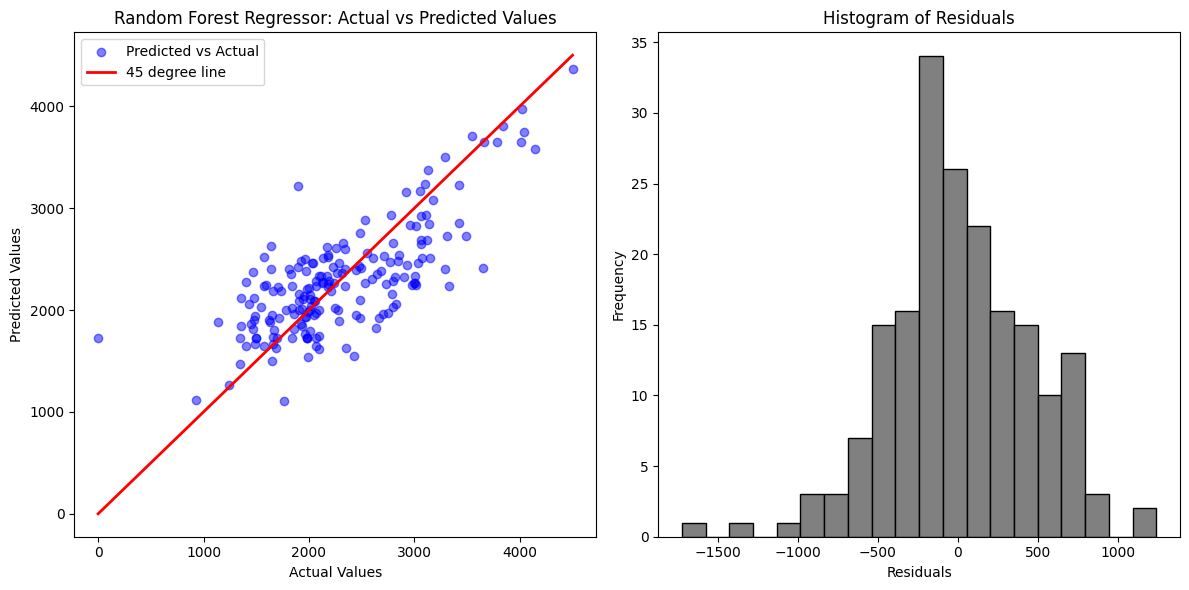

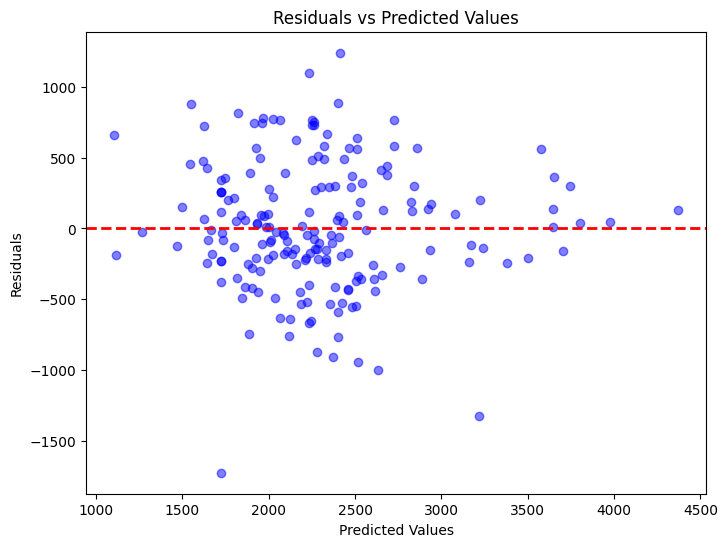

In [ ]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(12, 6))

# Scatter plot of Actual vs Predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', linewidth=2, label='45 degree line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: Actual vs Predicted Values')
plt.legend()

# Create a histogram of the residuals
residuals = y_test - y_pred_rf
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, color='gray', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()

# Create a scatter plot of residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [ ]:
print("Random Forest Regressor RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest Regressor R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Regressor RMSE: 450.62635912445865
Random Forest Regressor R2 Score: 0.5703928463583526


**INFERENCE:** An R² score of 0.570 means that approximately 57% of the variance in the dependent variable (e.g., calories burned) can be explained by the independent variables (e.g., steps, distance, activity minutes) in your model.

Here,We can conclude that Random Forest Regressor model is best suited for this dataset than the Linear Regression Model with 43.2%.

# Longitudinal Analysis

Analyzing trends over time to understand changes in activity levels.

In [ ]:
# Convert 'ActivityDate' to datetime format
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

In [ ]:
# Grouping by date to analyze trends over time
daily_activity = df.groupby('ActivityDate').agg({
    'TotalSteps': 'sum',
    'Calories': 'sum',
    'VeryActiveMinutes': 'sum',
    'FairlyActiveMinutes': 'sum',
    'LightlyActiveMinutes': 'sum',
    'SedentaryMinutes': 'sum'
}).reset_index()

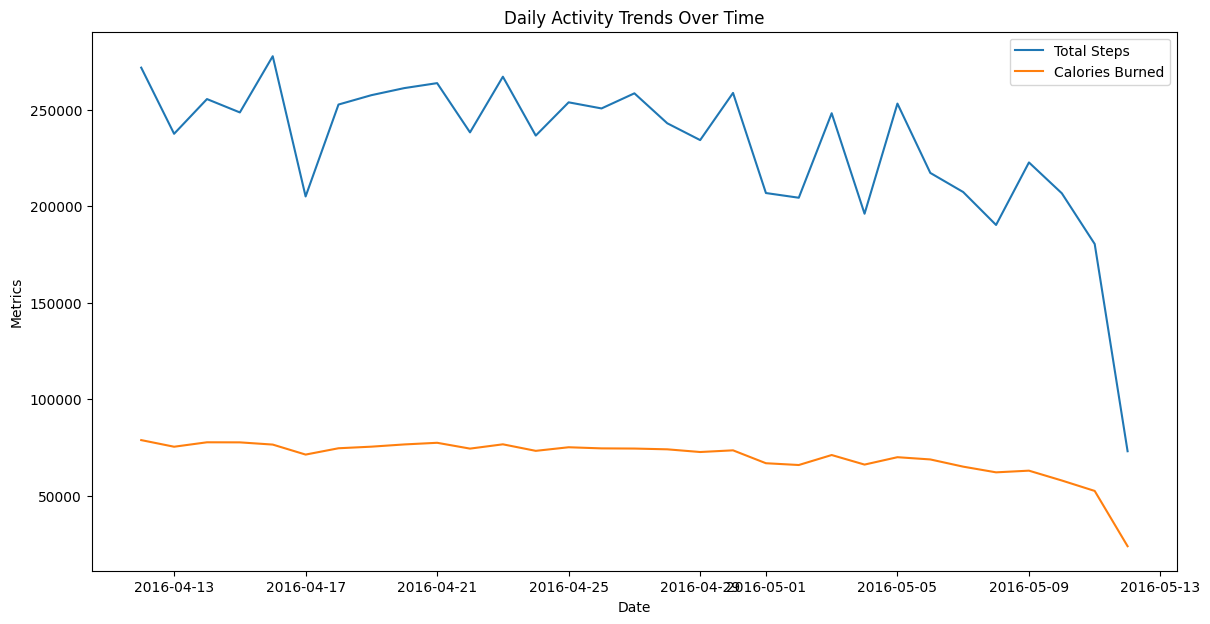

In [ ]:
# Plotting trends over time
plt.figure(figsize=(14, 7))
plt.plot(daily_activity['ActivityDate'], daily_activity['TotalSteps'], label='Total Steps')
plt.plot(daily_activity['ActivityDate'], daily_activity['Calories'], label='Calories Burned')
plt.title('Daily Activity Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Metrics')
plt.legend()
plt.show()

# Personalized Health Recommendations

In [ ]:
# Based on model predictions, provide personalized recommendations
def provide_recommendations(row):
    if row['TotalSteps'] < 5000:
        return "Increase your daily steps to at least 5000 to maintain good health."
    elif row['Calories'] < 2000:
        return "Try to burn more calories to maintain a healthy lifestyle."
    elif row['VeryActiveMinutes'] < 30:
        return "Aim for at least 30 minutes of very active minutes per day."
    else:
        return "Great job! Keep maintaining your current activity levels."


# Adding recommendations to the dataframe
df['Recommendations'] = df.apply(provide_recommendations, axis=1)


In [ ]:
# Displaying the first few rows with recommendations
print(df[['ActivityDate', 'TotalSteps', 'Calories', 'VeryActiveMinutes', 'Recommendations']].head())

  ActivityDate  TotalSteps  Calories  VeryActiveMinutes  \
0   2016-04-12       13162      1985                 25   
1   2016-04-13       10735      1797                 21   
2   2016-04-14       10460      1776                 30   
3   2016-04-15        9762      1745                 29   
4   2016-04-16       12669      1863                 36   

                                     Recommendations  
0  Try to burn more calories to maintain a health...  
1  Try to burn more calories to maintain a health...  
2  Try to burn more calories to maintain a health...  
3  Try to burn more calories to maintain a health...  
4  Try to burn more calories to maintain a health...  


# Conclusion

Analyzing this dataset provides a comprehensive view of physical activity behaviors and their relationship with calorie expenditure and overall health. Predictive modeling offers insights into how different types of physical activities influence calorie burning, allowing for more tailored recommendations to promote healthier lifestyles. By examining correlations and trends over time, we can deepen our understanding of activity patterns and their long-term effects on well-being, leading to more informed and personalized health guidance.